In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

# Ideas
GMM assumes there are multiple normal distributions generating the data. Our goal is to figure out what those distributions are, and which data points belong to each one.

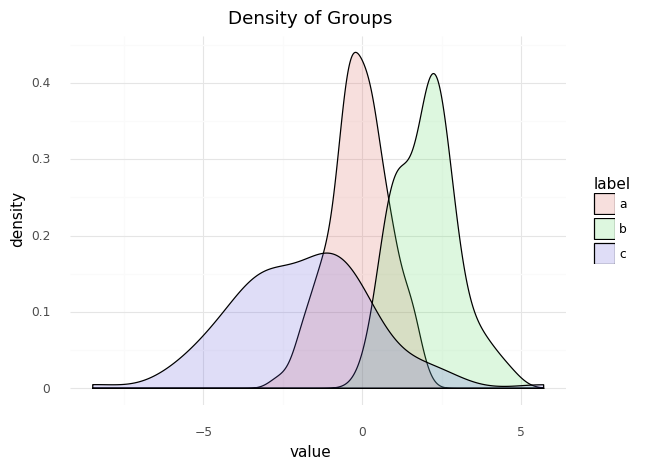

<ggplot: (8743132934317)>


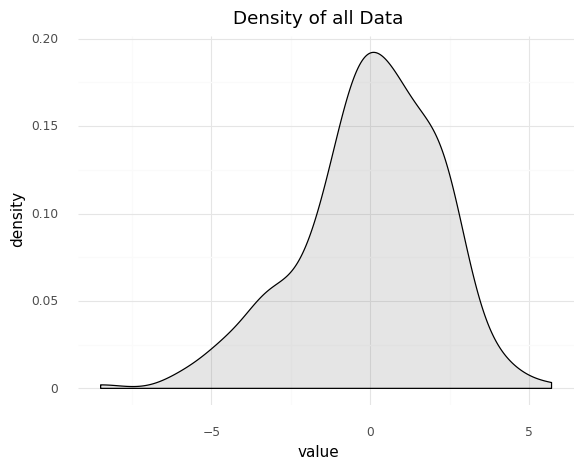

<ggplot: (8743132922737)>


In [3]:
np.random.seed(42)

n = 100

a = np.random.normal(size = n, loc = 0, scale = 1)
b = np.random.normal(size = n, loc = 2, scale = 1)
c = np.random.normal(size = n, loc = -2, scale = 2)

combo = np.concatenate([a,b,c])

label = np.repeat(["a","b", "c"], n)

df = pd.DataFrame({"value": combo, "label": label})

print(ggplot(df,aes(x = "value", fill = "label")) + geom_density(alpha = 0.2) +
 labs(title = "Density of Groups") + theme_minimal())
print(ggplot(df,aes(x = "value")) + geom_density(alpha = 0.2, fill = "gray") +
 labs(title = "Density of all Data") + theme_minimal())

# SKLEARN

In [4]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


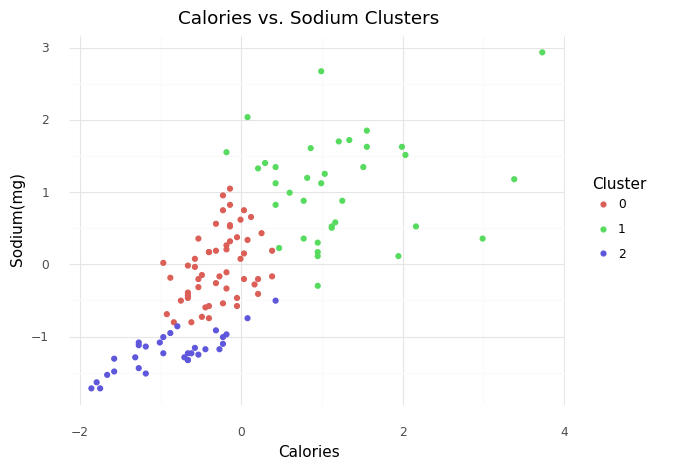

<ggplot: (8743128237393)>

In [10]:
features = ["Calories", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)


model = GaussianMixture(n_components = 3)
model.fit(X[features])

X["cluster"] = model.predict(X)


(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = "factor(cluster)")) + 
 geom_point() + theme_minimal() + labs(title = "Calories vs. Sodium Clusters") +
 scale_color_discrete(name = "Cluster"))

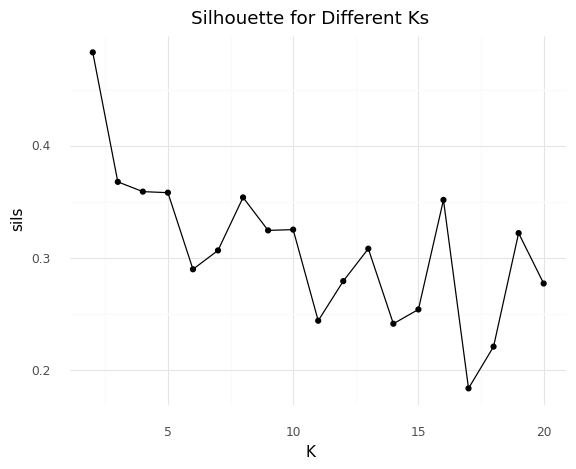

<ggplot: (8743128151769)>

In [11]:
features = ["Calories", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sils = []

for k in ks:
    gmm = GaussianMixture(n_components = k)
    gmm.fit(X[features])
    
    sils.append(silhouette_score(X, gmm.predict(X)))
    
sil_df = pd.DataFrame({"K": ks,
                      "silhouette": sils})

(ggplot(sil_df, aes(x = "K", y = "sils")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette for Different Ks"))


SILHOUETTE:  0.48357137404062256


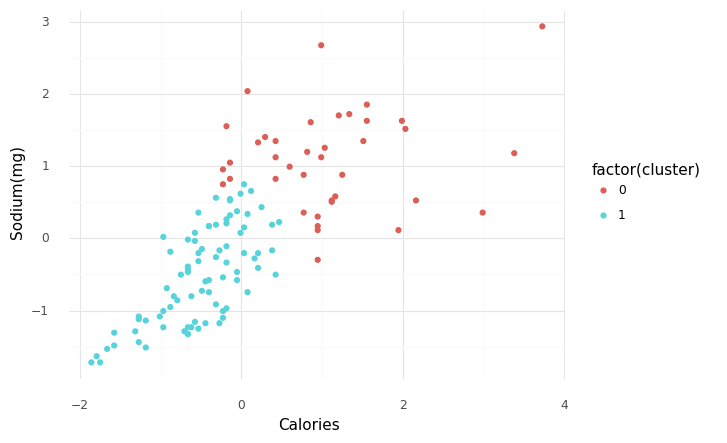

<ggplot: (8769926097171)>

In [ ]:
# fit final model

EM = GaussianMixture(n_components = 2)

EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETTE: ", silhouette_score(X, cluster))

X["cluster"] = cluster

(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = "factor(cluster)")) + geom_point() + 
theme_minimal())


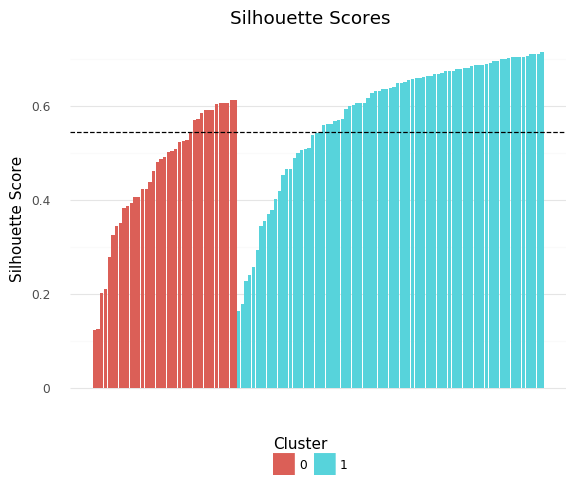

<ggplot: (8769957372323)>

In [ ]:
sil_points = silhouette_samples(X, cluster)
# sil_points

# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] = cluster

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])


(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)")) + 
geom_bar(stat = "identity") +
geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))

# Multiple Dimensions

In [ ]:
features = ["Sugar(g)", "Protein(g)", "Fat(g)"]

X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X)


In [ ]:
EM = GaussianMixture(n_components = 3)

EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
cluster = EM.predict(X)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [ ]:
silhouette_score(X, cluster)

0.41269446652563374

In [ ]:
EM.predict_proba(X)

array([[9.99999436e-001, 6.79581016e-023, 5.64000443e-007],
       [9.99999998e-001, 9.73680695e-019, 1.99343772e-009],
       [1.00000000e+000, 8.54568127e-024, 5.28790932e-017],
       [1.00000000e+000, 1.11035226e-010, 3.78904272e-021],
       [1.00000000e+000, 1.57645674e-016, 5.32491769e-019],
       [9.99999749e-001, 2.33259994e-017, 2.51458530e-007],
       [1.00000000e+000, 3.29575300e-018, 1.70243512e-011],
       [1.00000000e+000, 2.99562022e-014, 1.69379406e-029],
       [9.75659092e-001, 2.43409084e-002, 7.43784216e-025],
       [1.47447800e-001, 8.52552200e-001, 4.22527258e-051],
       [1.11677512e-003, 9.98883225e-001, 1.15520051e-095],
       [2.45830490e-006, 9.99997542e-001, 2.64946012e-138],
       [4.25247877e-001, 5.74752123e-001, 3.75059212e-018],
       [4.88025633e-001, 5.11974367e-001, 7.52789852e-021],
       [3.00116330e-002, 9.69988367e-001, 1.81630011e-058],
       [1.06906574e-002, 9.89309343e-001, 3.41683965e-066],
       [1.06882263e-005, 9.99989312e-001

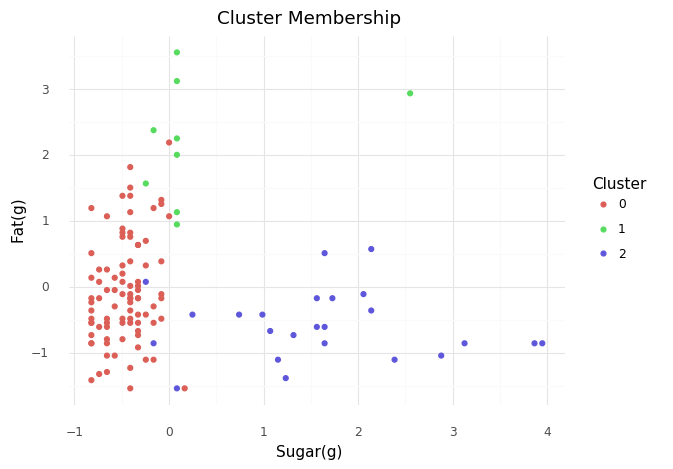

<ggplot: (8769925487123)>

In [ ]:
X["cluster"] = cluster

(ggplot(X, aes(x = "Sugar(g)", y = "Fat(g)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))

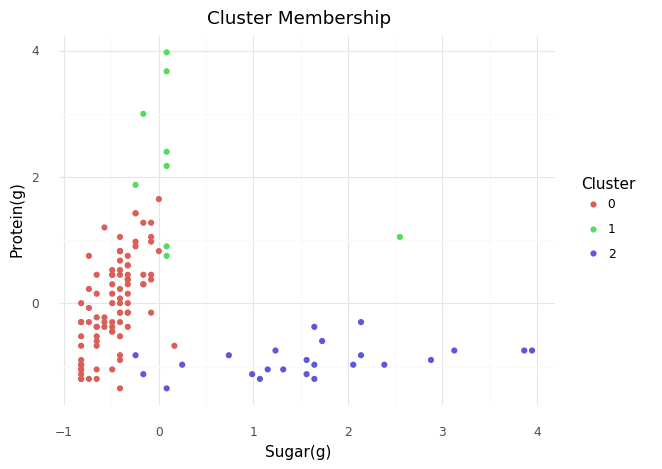

<ggplot: (8769926332257)>

In [ ]:
(ggplot(X, aes(x = "Sugar(g)", y = "Protein(g)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))

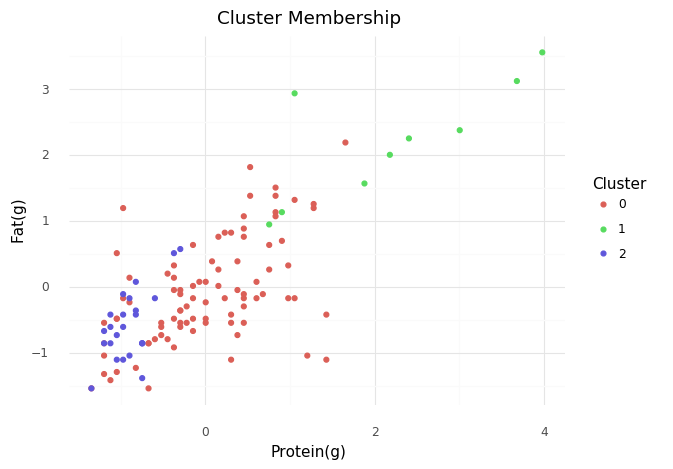

<ggplot: (8769957061904)>

In [ ]:
(ggplot(X, aes(x = "Protein(g)", y = "Fat(g)", color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership") + scale_color_discrete(name ="Cluster"))

# Another Example

In [ ]:
bey = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
bey.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


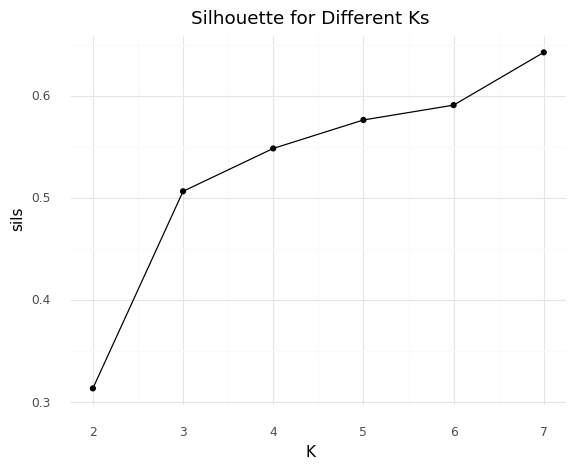

<ggplot: (8769957587631)>

In [ ]:
features = ["speechiness", "acousticness", "instrumentalness", "liveness", "valence"]

# z = StandardScaler() they have the same scale
X[features] = bey[features]
Xdf = X

n_components = [2,3,4,5,6,7]

sils = []
for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    colName =  "assign" + str(n) 
    clusters = gmm.predict(X)
    
    Xdf[colName] = clusters
    
    sils.append(silhouette_score(X, clusters))
    
sil_df = pd.DataFrame({"K": n_components,
                      "silhouette": sils})

(ggplot(sil_df, aes(x = "K", y = "sils")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette for Different Ks"))

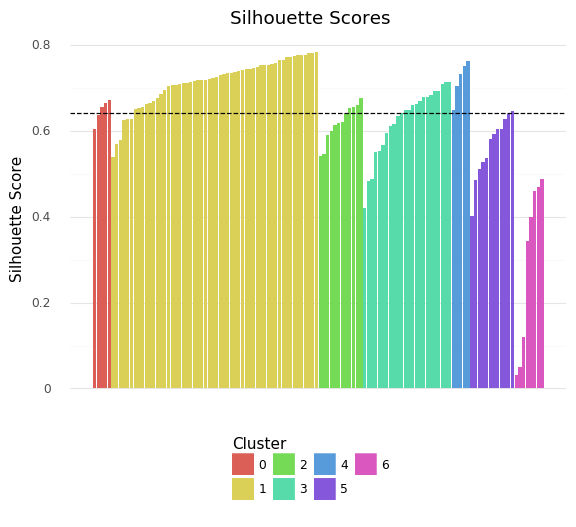

<ggplot: (8769957078580)>

In [ ]:
final_gmm = GaussianMixture(7)
final_gmm.fit(X)

cluster = final_gmm.predict(X)

sil_points = silhouette_samples(X, cluster)
# sil_points

# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] = cluster

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])


(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)")) + 
geom_bar(stat = "identity") +
geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))